## EMPLOYEE PROMOTION & STARTUP CASE STUDY

#### Importing the useful libraries

In [1]:
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd 

#### Importing the data set:

In [2]:
train=pd.read_csv('Skill_train.csv') # importing the train dataset
test=pd.read_csv('Skill_test.csv')   # importing the test dataset

In [137]:
train.iloc[:5 , 1:16:2]

,region,gender,no_of_trainings,previous_year_rating,awards_won?,is_promoted
0,31,0,1,5.0,0,0
1,14,1,1,5.0,0,0
2,10,1,1,3.0,0,0
3,15,1,2,1.0,0,0
4,18,1,1,3.0,0,0


In [138]:
test.iloc[:5 , 1:16:2]

,education,age,length_of_service,avg_training_score
0,0,24,1,77
1,0,31,5,51
2,0,31,4,47
3,0,31,9,65
4,0,30,7,61


In [5]:
print(train.shape, test.shape)
#getting the shape of the train and test data

(54808, 13) (23490, 12)


In [6]:
train.info()  
# finding the description of the train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [7]:
test.info() 
# finding the description of the test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


## Data Preprocessing 

### 1. Data Cleaning

In [8]:
# checking missing values

print(train.isnull().sum()) 

print(test.isnull().sum())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64


In [9]:
#Find the total number of missing values from the train dataset
train.isnull().sum().sum()

6533

In [10]:
#Find the total number of missing values from the test dataset
test.isnull().sum().sum()

2846

##### Mode is the most frequently occurring value. We are filling the missing values using the most frequent values of the entire dataset.


In [11]:
#Replace the missing values for categorical columns with mode for train dataset:
train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [12]:
train.info() 
#again checking the dataset description after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


Filling the missing values for categorical columns with mode for test dataset:

In [13]:
test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0])
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
dtype: int64

In [14]:
test.info() # again checking the dataset description after data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  awards_won?           23490 non-null  int64  
 11  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 2.2+ MB


In [15]:
# we'll drop the employee_id variable from the data set

In [16]:
train=train.drop(["employee_id"], axis=1) 

In [17]:
test=test.drop("employee_id",axis=1)

In [18]:
train_describe=train.describe()
#evaluating the descriptive statistics measure of the train dataset.

In [19]:
train_describe

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,1.253011,34.803915,3.304481,5.865512,0.023172,63.386750,0.085170
std,0.609264,7.660169,1.214770,4.265094,0.150450,13.371559,0.279137
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


In [20]:
test.describe() #evaluating the descriptive statistics measure of the test dataset.

,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,1.254236,34.782929,3.312984,5.810387,0.022776,63.263133
std,0.600910,7.679492,1.216959,4.207917,0.149191,13.411750
min,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000
25%,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000
50%,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,99.000000


## 2. EDA(Exploratory Data Analysis) and Data Visualisation

#### Mean score of employees with different educational background

In [21]:
#mean score of training for different educational qualification
train.groupby(["education"])['avg_training_score'].mean() 

education
Bachelor's          63.097446
Below Secondary     64.925466
Master's & above    64.061240
Name: avg_training_score, dtype: float64

#### Distribution of employees across various departments

In [22]:
 # counting the number of employees in each department
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

### a) Univariate Analysis 

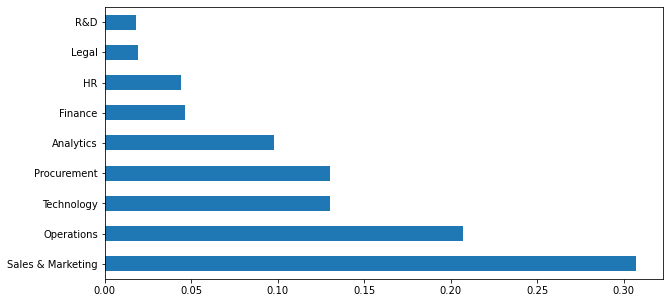

In [23]:
# bar chart showing the comparison of number of employees in different department
train.department.value_counts(normalize=True)
plt.figure(figsize=(10,5))
train.department.value_counts(normalize=True).plot.barh()
plt.show()

##### sales and marketing is the most trending domain as the number of employees in that department is high in comparison to other departments.

C:\Users\USER\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1666: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


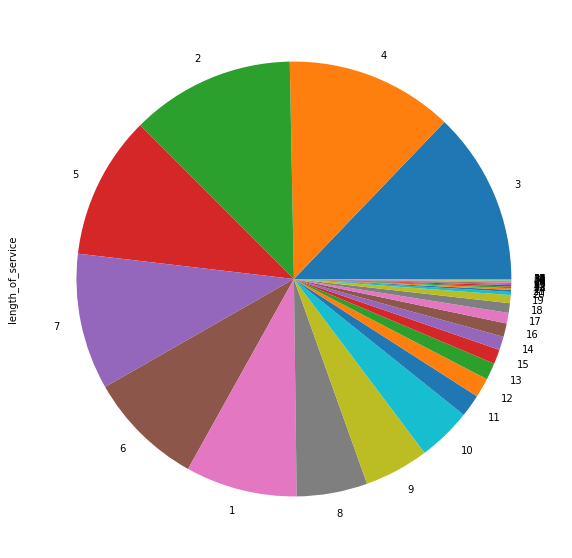

In [24]:
train.length_of_service.value_counts(normalize=True)

plt.figure(figsize=(15,10))
train.length_of_service.value_counts(normalize=True).plot.pie()
plt.show()

##### Most of the employees are least experienced.

In [25]:
train_depart=train.drop(["awards_won?","is_promoted"], axis=1)

In [26]:
train_depart.groupby("department").mean() # checking the department wise descriptive statistics of the train dataset

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
department,,,,,
Analytics,1.337818,32.431241,3.508782,4.932735,84.602952
Finance,1.304022,32.058754,3.449921,4.819401,60.222003
HR,1.053763,34.385856,3.433830,5.683623,50.018197
Legal,1.089509,33.832531,3.339750,4.599615,59.868142
Operations,1.160821,36.073669,3.599401,6.416020,60.226648
Procurement,1.322779,35.899972,3.280891,6.331045,70.122443
R&D,1.402402,32.842843,3.514515,4.554555,84.596597
Sales & Marketing,1.277435,34.860629,3.062648,5.912292,50.261698
Technology,1.260857,34.867190,3.146540,5.914822,79.928692


In [27]:
round(train_depart.groupby("gender").mean(),0)
# mean of data grouped by gender

,no_of_trainings,age,previous_year_rating,length_of_service,avg_training_score
gender,,,,,
f,1.0,35.0,3.0,6.0,64.0
m,1.0,35.0,3.0,6.0,63.0


In [28]:
pd.crosstab(train["department"],train["gender"]) # number of males and females in different departments

gender,f,m
department,,
Analytics,513,4839
Finance,681,1855
HR,1006,1412
Legal,149,890
Operations,4677,6671
Procurement,3287,3851
R&D,57,942
Sales & Marketing,3154,13686
Technology,2788,4350


##### In case of each department, the number of male employees is higher than that of female employees.

In [29]:
pd.crosstab(train["awards_won?"],train["gender"])
# number of males and females who won awards during their working period

gender,f,m
awards_won?,,
0,15943,37595
1,369,901


##### In the given data, 369 Female employees got  awards whereas 901 Male employees got awards during their working period

In [30]:
pd.crosstab(train["is_promoted"],train["gender"]) 
# Number of males and females who got promotion

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


##### Total 1467 Female employees got promotion , whereas 3201 Male employees got  promotion at the same time

In [31]:
pd.crosstab(train["is_promoted"],train["education"]) 
# the number of employees who got promotion with respect to their educational qualification

education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,35948,738,13454
1,3130,67,1471


##### 3130 Employees who has done Bachelor's got promotion , 67 Employees who has Below Secondary degree, got promotion and 1471 Employees who have Master's or above degree, got promotion

In [32]:
# Mean and median comparison
mean_by_dept = train_depart.groupby('department').mean()
median_by_dept = train_depart.groupby('department').median()

mm_comp = []
index = []
for row_mean, row_median in zip(mean_by_dept.var().iteritems(), median_by_dept.var().iteritems()):
    mm_comp.append([row_mean[1], row_median[1]])
    index.append(row_mean[0])

mm_comp = pd.DataFrame(mm_comp, columns=['mean', 'median'], index=index)
mm_comp

,mean,median
no_of_trainings,0.014008,0.000000
age,2.121716,1.777778
previous_year_rating,0.032060,0.111111
length_of_service,0.547817,0.277778
avg_training_score,188.316978,193.750000


##### The above table shows the result of variance for mean and median values of each numeric variable. There is clearly more information gain from the mean values in the data set. 

In [33]:
train_describe.transpose()[['std', 'min', 'max']] 
# standard deviation, and minimum , maximum value difference are shown to indicate the deviation in values

,std,min,max
no_of_trainings,0.609264,1.0,10.0
age,7.660169,20.0,60.0
previous_year_rating,1.214770,1.0,5.0
length_of_service,4.265094,1.0,37.0
awards_won?,0.150450,0.0,1.0
avg_training_score,13.371559,39.0,99.0
is_promoted,0.279137,0.0,1.0


### b) Bivariate Analysis 

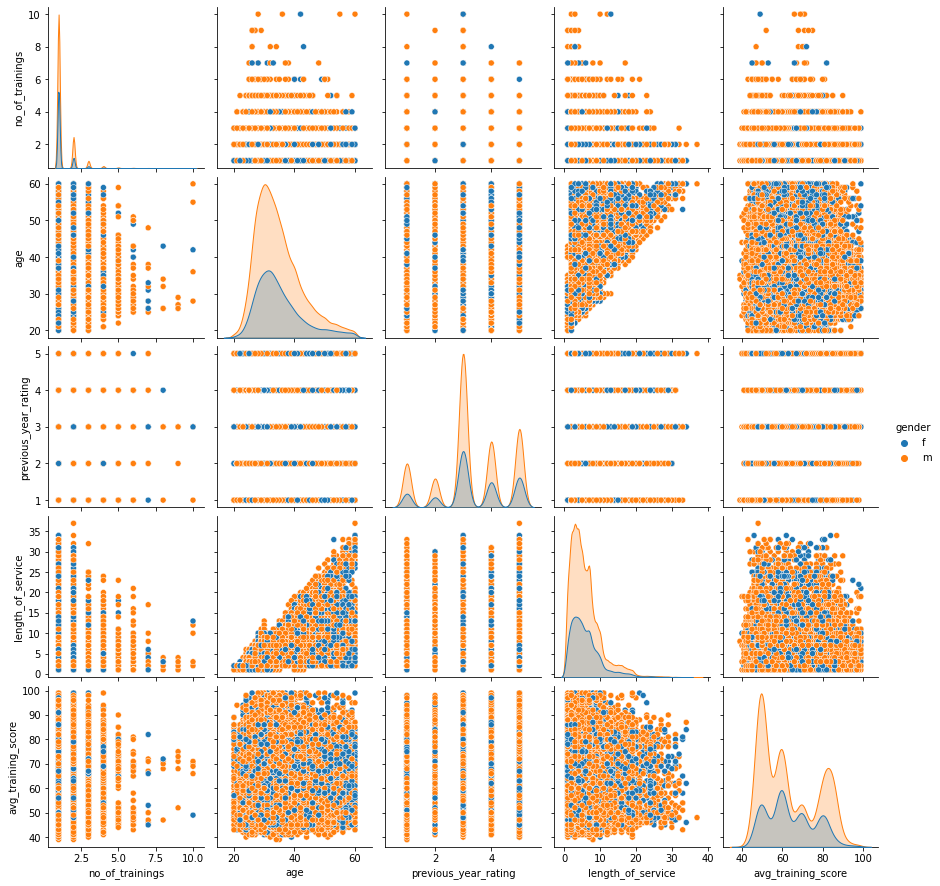

In [34]:
sns.pairplot(train_depart, hue= "gender")
# pair plot of different parameters based on gender

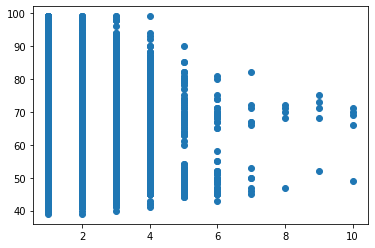

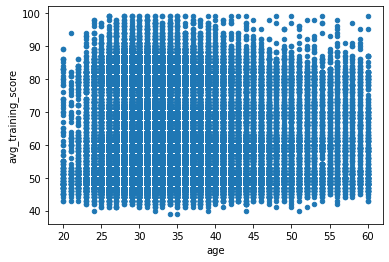

In [35]:
plt.scatter(train.no_of_trainings,train.avg_training_score)
plt.show()      
# scatter plot of number of training provided vs average training score they got

train.plot.scatter(x="age",y="avg_training_score")
plt.show() 
# scatter plot of age and average training score

<AxesSubplot:>

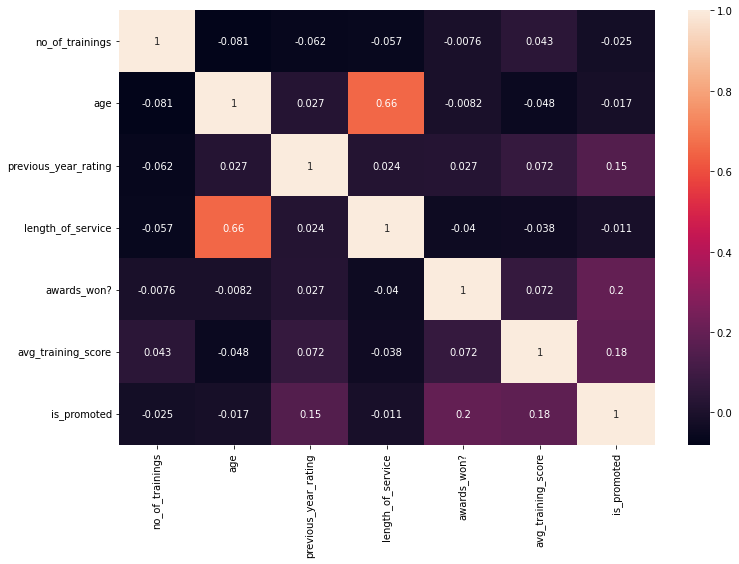

In [36]:
plt.figure(figsize=(12,8)) 
# heat map showing the correlation values of different parameters in train dataset
#to indicate how much all the parameters are related to each other.
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

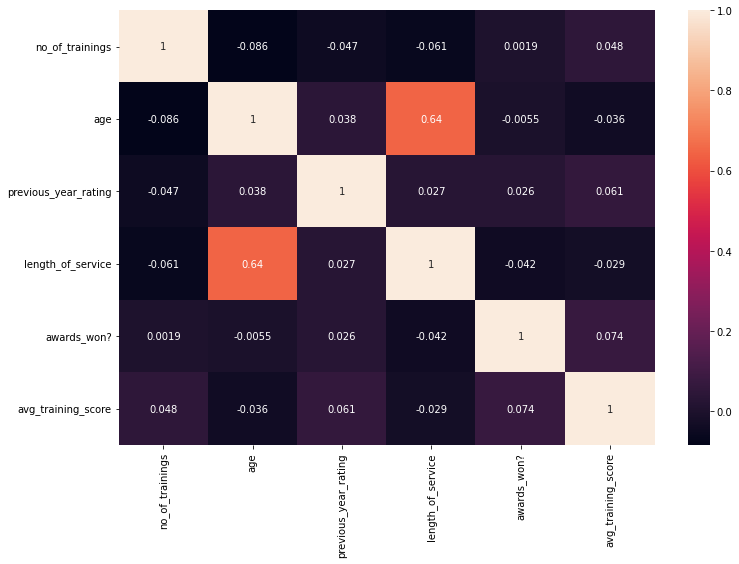

In [37]:
plt.figure(figsize=(12,8))
# heat map showing the correlation values of different parameters in test dataset 
#to indicate how much all the parameters are related to each other.
sns.heatmap(test.corr(),annot=True)

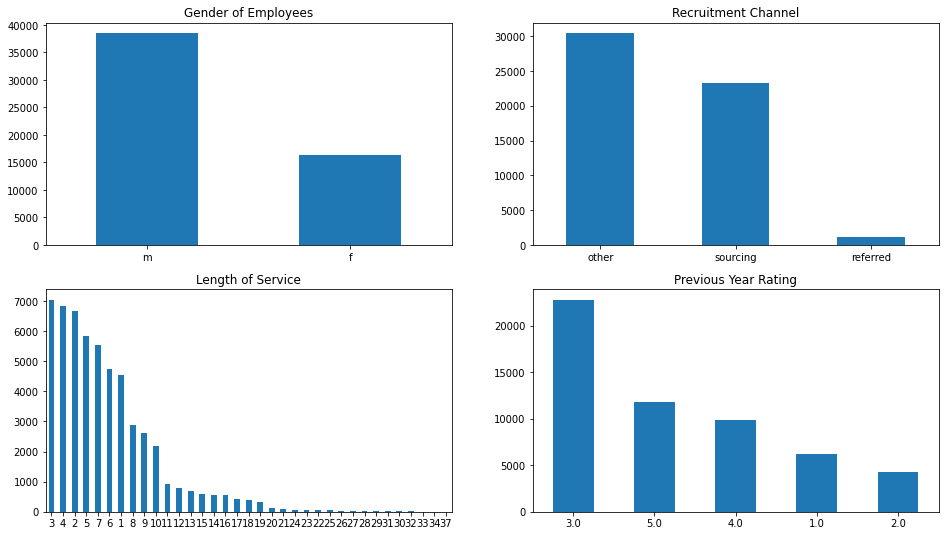

In [38]:
#barplots of different attributes based on their datapoints
plt.subplot(221)

train['gender'].value_counts().plot(kind='bar', title='Gender of Employees', figsize=(16,9))

plt.xticks(rotation=0)

plt.subplot(222)

train['recruitment_channel'].value_counts().plot(kind='bar', title='Recruitment Channel')

plt.xticks(rotation=0)

plt.subplot(223)

train['length_of_service'].value_counts().plot(kind='bar', title='Length of Service')

plt.xticks(rotation=0)

plt.subplot(224)

train['previous_year_rating'].value_counts().plot(kind='bar', title='Previous Year Rating')

plt.xticks(rotation=0)

plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


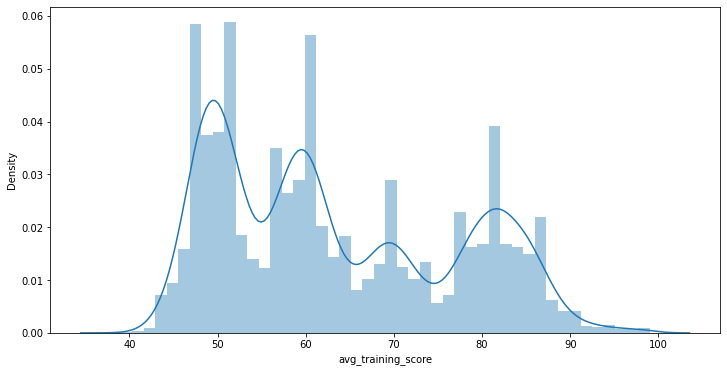

In [39]:
plt.figure(figsize=(12,6)) 
# histogram of average training score
sns.distplot(train['avg_training_score'])
plt.show()

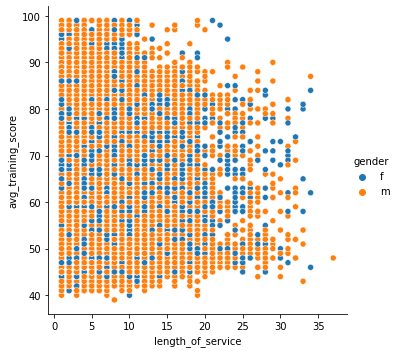

In [40]:
sns.relplot(x='length_of_service', y='avg_training_score', hue='gender', data=train)
# plot to show the relationship between length of service and average training score based on gender.

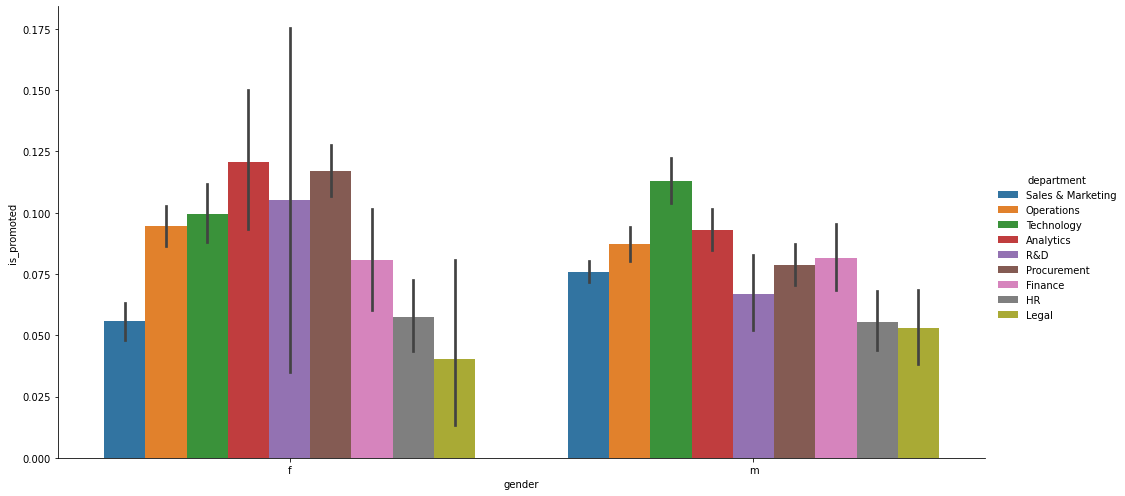

In [41]:
# barplots showing the employees who got promotion among males and females 
#with respect to different departments
sns.catplot(x="gender", y="is_promoted", hue="department", kind="bar", data=train, height=7, aspect=2)

<AxesSubplot:xlabel='count', ylabel='education'>

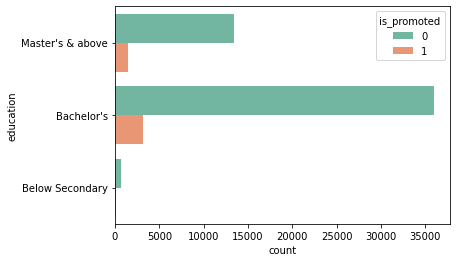

In [42]:
# barplots showing the employees who got promotion of different educational qualification 

sns.countplot(y ='education', hue = "is_promoted",data = train, palette = "Set2")


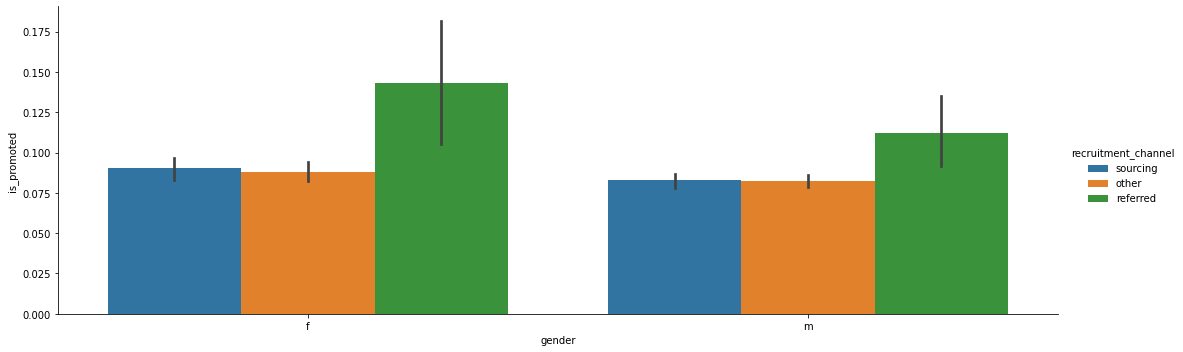

In [43]:
# barplots showing the employees who got promotion among males and females 
#with respect to different recruitment channels
sns.catplot(x="gender", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=5, aspect=3)

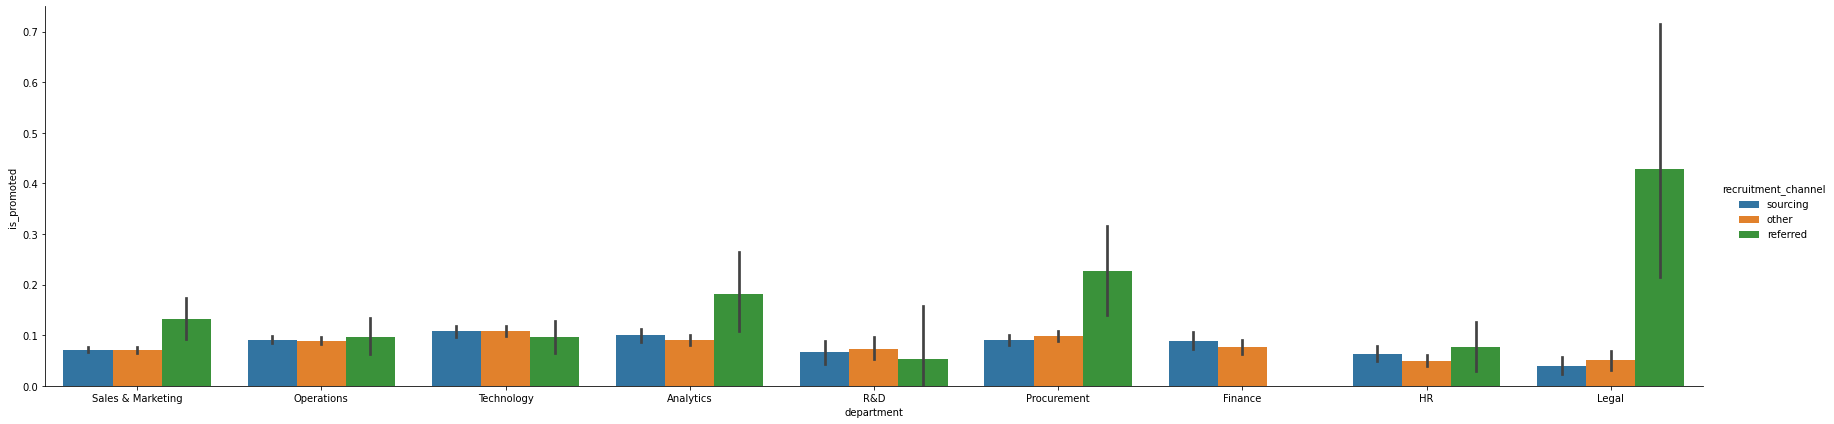

In [44]:
# barplots showing the employees who got promotion of different departments 
#with respect to different recruitment channels
sns.catplot(x="department", y="is_promoted", hue="recruitment_channel", kind="bar", data=train, height=6, aspect=4)

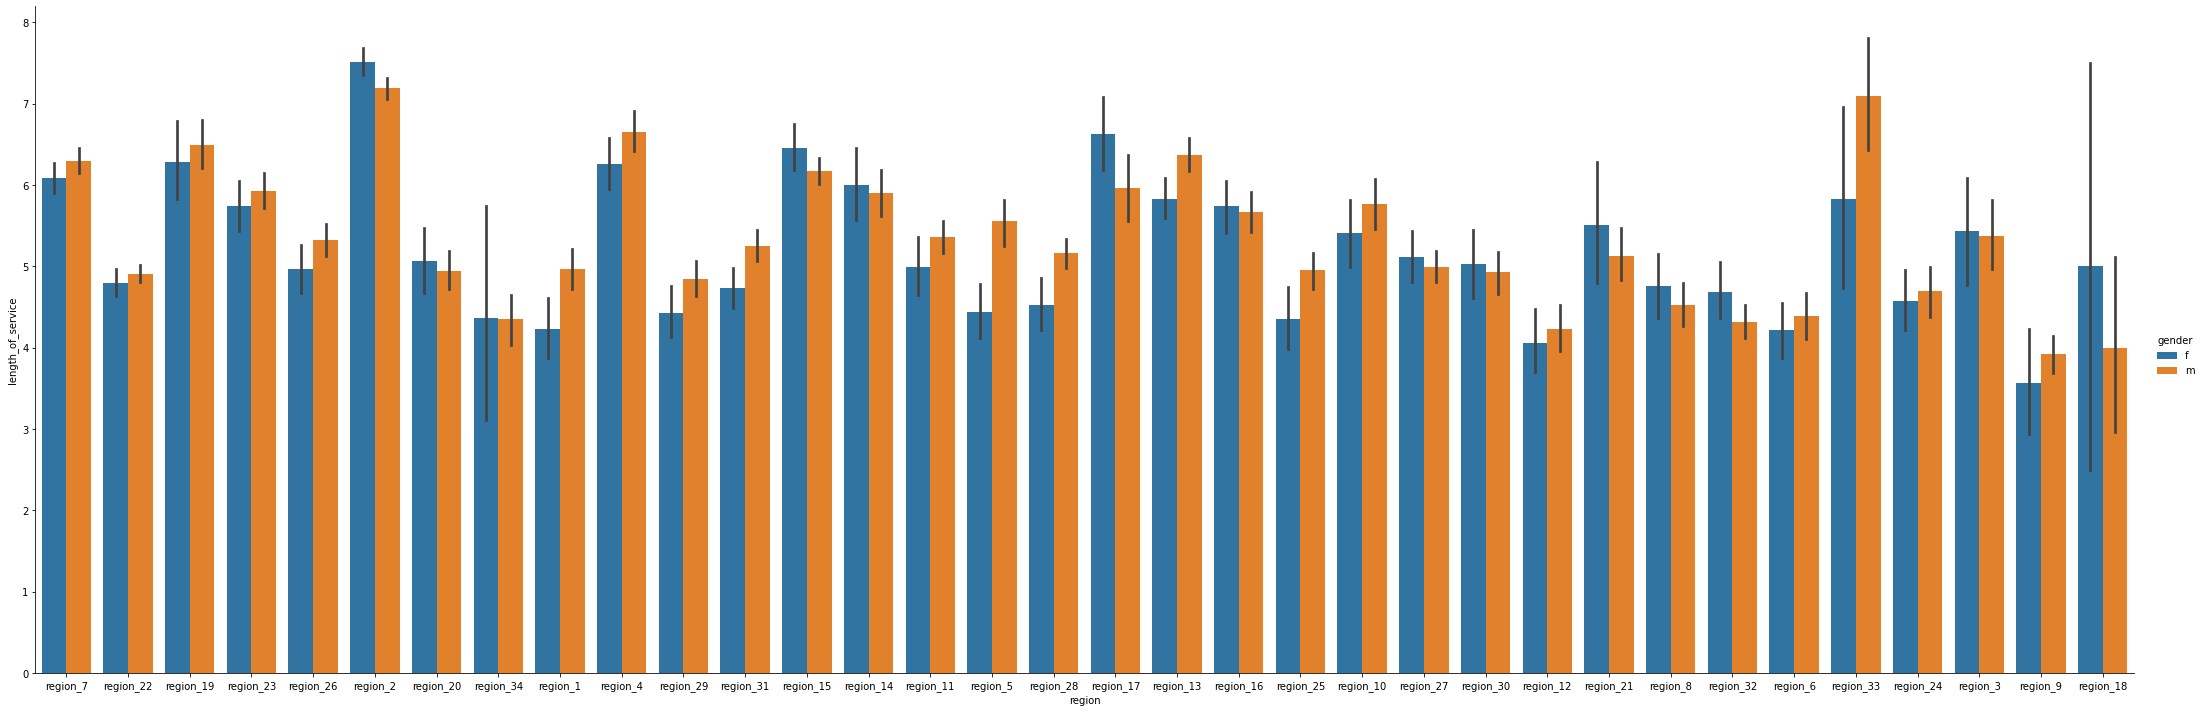

In [45]:
# barplots showing the employees who got promotion of different departments 
#with respect to different recruitment channels
sns.catplot(x="region",y="length_of_service",hue="gender",kind="bar", data=train, height=10, aspect=3)

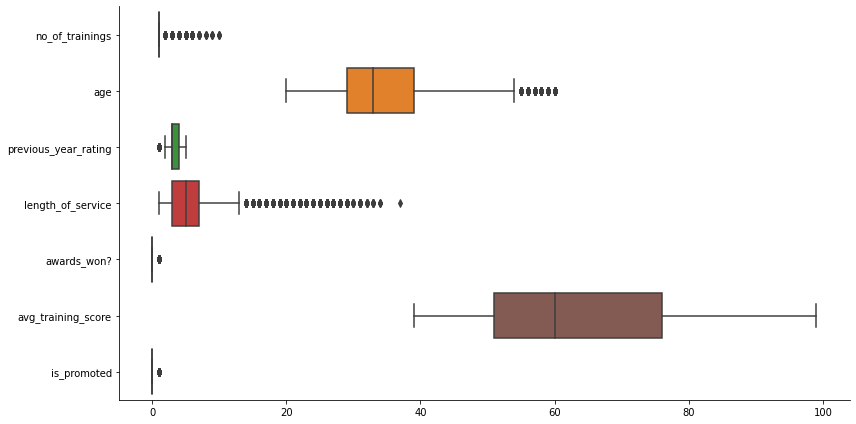

In [46]:
sns.catplot(data=train, orient="h", kind="box", height=6, aspect=2) 
# boxplot of the different attributes of the train data set.

In [47]:
cats = [c for c in train.columns if train[c].dtypes=='object']
nums = [c for c in train.columns if c not in cats]
print(cats)
print(nums)

['department', 'region', 'education', 'gender', 'recruitment_channel']
['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']


In [48]:
true_cats = ['department', 'region', 'education', 'gender', 'recruitment_channel','awards_won?', 
             'previous_year_rating','length_of_service', 'no_of_trainings']

In [49]:
true_nums = [c for c in train.columns if c not in true_cats]
true_nums.remove('is_promoted')

In [50]:
import matplotlib.gridspec as gridspec

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

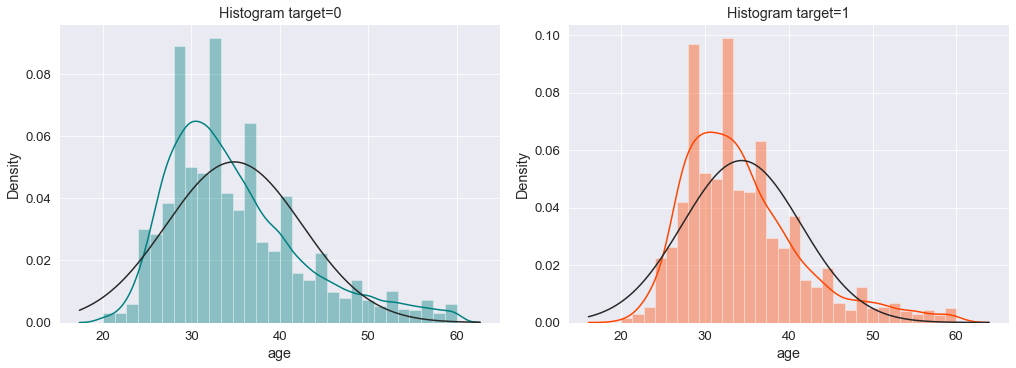

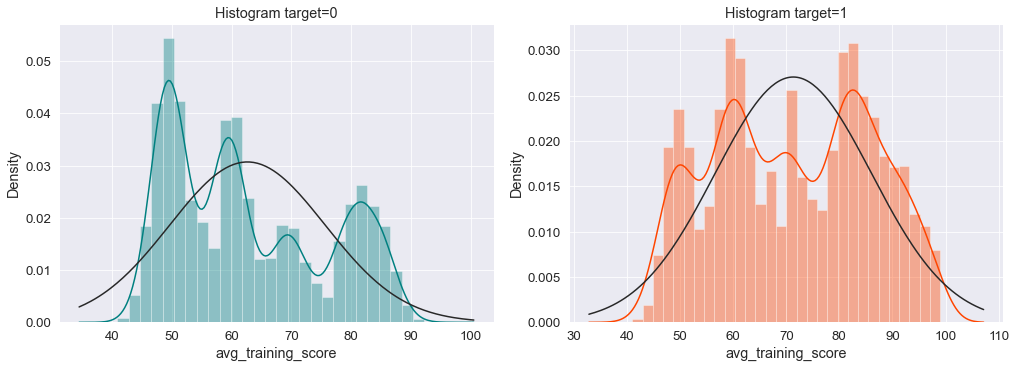

In [51]:
# histogram for promotion data based on age and average training score
from scipy.stats import norm  
from matplotlib.gridspec import GridSpec
sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    
    fig = plt.figure(constrained_layout=True, figsize=(14,5))
    grid = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram target=0')
    sns.distplot(train[train.is_promoted==0].loc[:,c].dropna(),bins=30, fit=norm, norm_hist=True,color='teal' , ax = ax1)
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.set_title('Histogram target=1')
    sns.distplot(train[train.is_promoted==1].loc[:,c].dropna(), bins=30, fit=norm, norm_hist=True,color='orangered' , ax = ax2)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

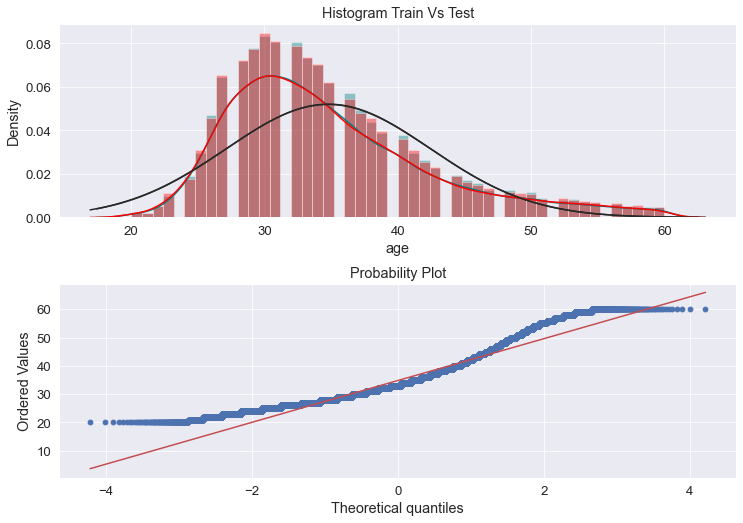

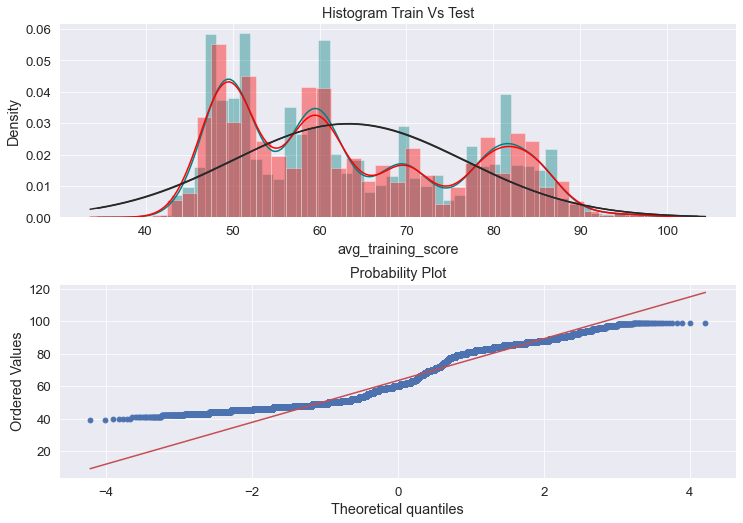

In [52]:
#histogram and QQ plot age and average training score attribute
from scipy.stats import norm 
from scipy import stats 
sns.set()
sns.set_style("darkgrid")
sns.set_context("paper")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.5})
for c in true_nums:
    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

 ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram Train Vs Test')
    ## plot the histogram. 
    sns.distplot(train.loc[:,c].dropna(),fit=norm, norm_hist=True,color='teal' , ax = ax1)
    sns.distplot(test.loc[:,c].dropna(),  fit=norm, norm_hist=True,color='red' , ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(train.loc[:,c].dropna(), plot = ax2)


In [53]:
# violinplot indicating the relationship between the employees who got promotion and the length of their service life 
#with respect to their previous year rating

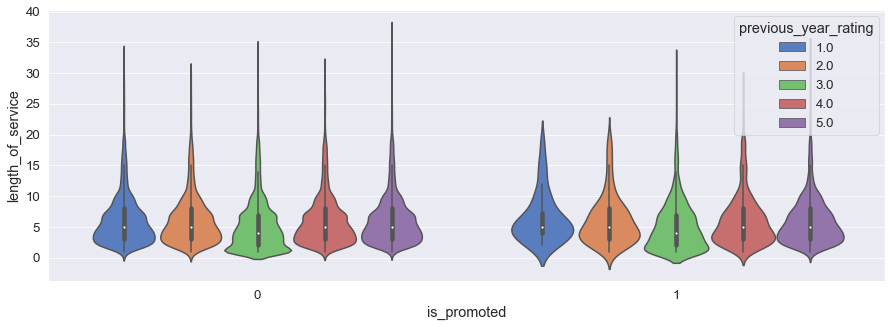

In [54]:
fig, ax = plt.subplots(figsize=(15, 5)) 
ax = sns.violinplot(x="is_promoted", y="length_of_service", hue="previous_year_rating",
                    data=train,palette="muted")

## Insights of the data

1. The employees with educational qualification below secondary, scored well in average during training period.
2. Sales and marketing department is the most trending domain as the number of employees is high as compared to other departments.
3. Most of employees are least experienced.
4. In the department of analytics,the employees scored well in average in comparison to other departments.
5. Female employees performed a bit well during their training period in comparison to male employees.
6.The number of male employees is higher than that of female employees.
7. Male employees received more awards(901) than female employees (369) during their service life.
8. The most of the employees with educational qualification bachelor's degree got promotion.
9. Most of the variables in data set are interrelated and contribute a role to predict the promotion of employees.
10. Maximum female employees got promotion from analytics department, and maximum male employees got promotion from technology department.
11. We can also observe that the employees who were refered in this service got promotion in the most of the cases for both male and female employees.
12. In region_2, people(both male and female) are more experienced than other regions.
13. The distribution of age and average training score attributes almost follow normal distribution.
14. In case of the female and male employees both, the peak is high for previous ratings 5.0.

## 3. Data Encoding

In [55]:
# Now we have performed data encoding to handle the categorical variables in a efficient way.

#### For train dataset 

In [56]:
train_columns=list(train.columns)
print("all_columns:\n {}".format(train_columns))

cat_cols1=list(train.select_dtypes(include=["object"]).columns)
print("cat_cols1:\n {}".format(cat_cols1))

all_columns:
 ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score', 'is_promoted']
cat_cols1:
 ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [57]:
train[cat_cols1].head()

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
label_encoder1 = LabelEncoder()
encoded_train = train
for i in cat_cols1:
    encoded_train[i] = label_encoder1.fit_transform(train[i])
encoded_train[cat_cols1].head()

,department,region,education,gender,recruitment_channel
0,7,31,2,0,2
1,4,14,0,1,0
2,7,10,0,1,2
3,7,15,0,1,0
4,8,18,0,1,0


In [144]:
train.iloc[:5 , 0:10:1]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?
0,7,31,2,0,2,1,35,5.0,8,0
1,4,14,0,1,0,1,30,5.0,4,0
2,7,10,0,1,2,1,34,3.0,7,0
3,7,15,0,1,0,2,39,1.0,10,0
4,8,18,0,1,0,1,45,3.0,2,0


#### For test dataset 

In [61]:
test_columns=list(test.columns)
print("all_columns:\n {}".format(test_columns))

cat_cols2=list(test.select_dtypes(include=["object"]).columns)
print("cat_cols2:\n {}".format(cat_cols2))

all_columns:
 ['department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'awards_won?', 'avg_training_score']
cat_cols2:
 ['department', 'region', 'education', 'gender', 'recruitment_channel']


In [62]:
test[cat_cols1].head()

,department,region,education,gender,recruitment_channel
0,Technology,region_26,Bachelor's,m,sourcing
1,HR,region_4,Bachelor's,f,other
2,Sales & Marketing,region_13,Bachelor's,m,other
3,Procurement,region_2,Bachelor's,f,other
4,Finance,region_29,Bachelor's,m,sourcing


In [63]:
label_encoder2 = LabelEncoder()
encoded_test = test
for i in cat_cols2:
    encoded_test[i] = label_encoder2.fit_transform(test[i])
encoded_test[cat_cols2].head()

,department,region,education,gender,recruitment_channel
0,8,18,0,1,2
1,2,28,0,0,0
2,7,4,0,1,0
3,5,11,0,0,0
4,1,21,0,1,2


In [145]:
train.iloc[:5 , 0:10:1]

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?
0,7,31,2,0,2,1,35,5.0,8,0
1,4,14,0,1,0,1,30,5.0,4,0
2,7,10,0,1,2,1,34,3.0,7,0
3,7,15,0,1,0,2,39,1.0,10,0
4,8,18,0,1,0,1,45,3.0,2,0


### Chi square test for feature selection:

chi-square independent test is a statistical test used to compare observed results with expected results. 
The purpose of this test is to determine if a difference between observed data and expected data is due to chance.

In [65]:
#H0: All the parameters used in the dataset are independent.
#H1: All the parameters used in the dataset are not independent.

In [66]:
from sklearn.feature_selection import chi2

In [67]:
x_train=train.drop(["is_promoted"], axis=1)
y_train=train["is_promoted"]

In [68]:
chi_scores = chi2(x_train,y_train)

In [69]:
chi_scores

(array([1.17185904e-03, 2.13326122e+01, 6.63563252e+01, 2.01311313e+00,
        3.01599472e-01, 1.00634908e+01, 2.72281031e+01, 5.74656810e+02,
        1.93510843e+01, 2.05400931e+03, 5.07297374e+03]),
 array([9.72691809e-001, 3.86106847e-006, 3.76349265e-016, 1.55945032e-001,
        5.82881429e-001, 1.51236397e-003, 1.80811304e-007, 5.44932210e-127,
        1.08757475e-005, 0.00000000e+000, 0.00000000e+000]))

In [70]:
#Among the abovementioned values, first array represents chi square values and the second array represnts p-values.

In [71]:
p_values = pd.Series(chi_scores[1],index = x_train.columns)
p_values.sort_values(ascending = False , inplace = True)

In [72]:
p_values

department               9.726918e-01
recruitment_channel      5.828814e-01
gender                   1.559450e-01
no_of_trainings          1.512364e-03
length_of_service        1.087575e-05
region                   3.861068e-06
age                      1.808113e-07
education                3.763493e-16
previous_year_rating    5.449322e-127
awards_won?              0.000000e+00
avg_training_score       0.000000e+00
dtype: float64

In [73]:
#if p value is less than level of significance, we can conclude that we have sufficient evidence to reject H0.
#if p value is greater than level of significance, we can conclude that we don't have enough evidence to reject H0.

##### At 5% level of significance,the parameters "department"," recruitment channel","gender" have higher p values, it says that we can't reject H0 i.e., this variables is independent of the other variables and can not be considered for model training. The rest parameters have less p value, so it can be concluded that the variables are not independent of each other and can be considered for model training.


### c) Multivariate analysis:

### PCA(Principle component analysis)

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed.

In [74]:
x_train=train.drop("is_promoted", axis=1)
y_train=train["is_promoted"]

In [75]:
from sklearn.decomposition import PCA 

In [76]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_train)
explained_variance = pca.explained_variance_ratio_
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [77]:
explained_variance

array([0.52416725, 0.23326364])

In [78]:
principalDf

,principal component 1,principal component 2
0,-14.013165,-14.071103
1,-3.101110,-1.249816
2,-13.599397,4.027320
3,-13.752680,2.192068
4,9.113906,1.804986
...,...,...
54803,13.263974,17.511893
54804,-7.320565,-2.596896
54805,15.776352,10.690967
54806,-17.570464,-19.659977


In [79]:
finalDf = pd.concat([principalDf, train[['is_promoted']]], axis = 1)

In [80]:
finalDf

,principal component 1,principal component 2,is_promoted
0,-14.013165,-14.071103,0
1,-3.101110,-1.249816,0
2,-13.599397,4.027320,0
3,-13.752680,2.192068,0
4,9.113906,1.804986,0
...,...,...,...
54803,13.263974,17.511893,0
54804,-7.320565,-2.596896,0
54805,15.776352,10.690967,0
54806,-17.570464,-19.659977,0


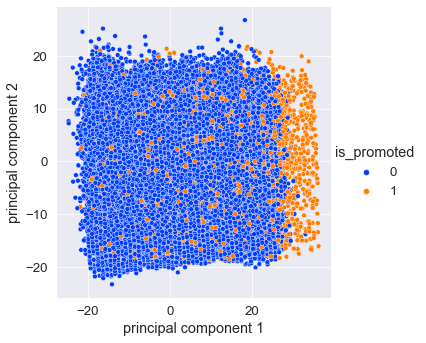

In [81]:
ax=sns.relplot(x='principal component 1', y='principal component 2', hue="is_promoted",data=finalDf,palette="bright")

##### Here, in this plot, the principal component 1 and principal component 2 are the new derived axes of the data.This plot reduces the dimensionality of the data. 

## 4. Classification

 Now classification model is generated on the encoded data based on the important attributes we found using chi-square test

In [82]:
x_train=train.drop(["department","gender","recruitment_channel","is_promoted"], axis=1)
y_train=train["is_promoted"]


In [83]:
test=test.drop(["department","gender","recruitment_channel"],axis=1)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import tree
from time import time

In [85]:
time1=[]

#### Logistic regression

In [86]:
start=time()


In [87]:
lr=LogisticRegression(max_iter=10000)

In [88]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [89]:
pred=lr.predict(test)

In [90]:
pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
end=time()

In [92]:
time1.append(end-start)

In [93]:
print("The Train score of Logistic Regression is :",lr.score(x_train,y_train))


The Train score of Logistic Regression is : 0.919044665012407


#### random forest

In [94]:
start=time()

In [95]:
rf = RandomForestClassifier(random_state=101)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=101)

In [96]:
pred_rf=rf.predict(test)

In [97]:
pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
end=time()

In [99]:
time1.append(end-start)

In [100]:
print("The Train score of Random Forest Classifier is :",rf.score(x_train,y_train))

The Train score of Random Forest Classifier is : 0.9945628375419647


#### XGBoost

In [101]:
start=time()

In [102]:
xgbc=xgb.XGBClassifier()
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [103]:
pred_xgbc=xgbc.predict(test)

In [104]:
pred_xgbc

array([0, 0, 0, ..., 0, 0, 0])

In [105]:
end=time()

In [106]:
time1.append(end-start)

In [107]:
print("The Train score of XGBoosting is :",xgbc.score(x_train,y_train))

The Train score of XGBoosting is : 0.929462852138374


#### decision tree

In [108]:
start=time()

In [109]:
clf = tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)


In [110]:
clf

DecisionTreeClassifier()

In [111]:
pred_clf=clf.predict(test)

In [112]:
pred_clf

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [113]:
end=time()

In [114]:
time1.append(end-start)

In [115]:
print("The Train score of XGBoosting is :",clf.score(x_train,y_train))

The Train score of XGBoosting is : 0.9946358195883812


In [116]:
P=["Logistic Regression","Random Forest","XGBoost","Decision tree"]

In [117]:
Q=[lr.score(x_train,y_train)*100,rf.score(x_train,y_train)*100, 
   xgbc.score(x_train,y_train)*100,clf.score(x_train,y_train)*100]

In [118]:
model_ev = pd.DataFrame({'Model': P, 'Training score': Q, 'computational time':time1})

In [119]:
print(model_ev)

                 Model  Training score  computational time
0  Logistic Regression       91.904467            0.707820
1        Random Forest       99.456284            3.880908
2              XGBoost       92.946285            0.976167
3        Decision tree       99.463582            0.251458


##### We have introduced logistic regression, XGboost, decision tree and random forest algorithm for the employee promotion dataset and collected the results(training score, predicted values for the test data set and computational time for train the model) we found from the classification model.

#### Train score comparison

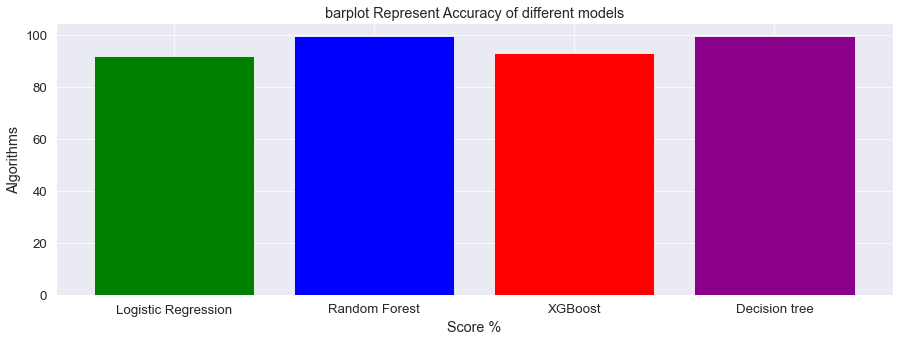

In [120]:
colors = ['green','blue','red','darkmagenta']
plt.figure(figsize=(15,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Score %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Training score'],color = colors)
plt.show()

##### we can conclude that Decision tree is the best fitted model for employee promotion data with respect to training score and  training computional time.

## Conclusion:

### In this project, we have performed data importing, data cleaning, feature selection, data visualisation, data encoding, principal component analysis, hypothesis testing and finally classication to predict the outcomes. We can also conclude that the decision tree is the best fitted model in terms of training score and computational time.